In [1]:
%pip install numpy pandas matplotlib datasets tqdm seaborn pyvi

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
import json
import re
import tqdm
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pyvi import ViTokenizer, ViPosTagger

## Imports
import nltk
nltk.download('stopwords')

## Options
pd.set_option("max_colwidth", None)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
path_half_final = r'E:\2_LEARNING_BKU\2_File_2\K22_HK241\CO3101_Do_an_Tri_tue_nhan_tao\Main\Dataset\dataset_without_big_dataset.csv'

df_half_final = pd.read_csv(path_half_final)

In [4]:
print(df_half_final.info())
df_half_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75345 entries, 0 to 75344
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    75345 non-null  object
 1   label   75345 non-null  int64 
 2   source  75345 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,text,label,source
0,"There are alot reasons to keep our the despised method of choosing the President. The First reason is because Certainty of Outcome, in the text its states that ""The reason is that the winning candidate's share of the Electoral College invariably exceeds his share of the popular vote. Another example from the text is ""Obama, he recieved 61.7 percent of the electoral vote compared to only 51.3 percent of the popular votes cast for him and Romney... because all of the states award electoral votes on a winner-take-all basis.\n\nAnother reason is that the Electiral College requires a presidential candidate to have trans-regional appeal,in that case, no region has enough electoral votes to elect a president, a solid regional favorite such as Romney was in the South , has no reason to campaign in those states because of the poor economy and because its not a wealthy state, he wont be able to campaign heavily. So he left with no votes and would have to find his Electoral College votes in a more suitable area. In the text its states that ""It is a Desriable result because a candidate with regional appeal is unlikely to be a successful president.""\n\nAlso the Electoral College restores some of the weight in the political balance the large states by population lose by virtue of the mal-apportionment Senate decreed in the Constitution. My proof is in the text ""The popular vote was very close in Florida in 2012 nevertheless Obama who won the that vote got 29 electoral votes. A same victory by the same margin in Wynoming would net the winner only 3 electoral votes.""So, other things equal, a large state gets more attention compared to a small state.\n\nAnd Finally the Electoral College avoids the problemof elections in which no candidate recieves a majority of the votes cast. For example ""Richard Nixon in '68 and Bill Clinton in '92 both had on 43 percent plurality of the popular votes, while winning a majority in the in the Electoral College.\n\nIn Conclusion I think that the we should keep Electoral Colleges and changing to election by popular voting to vote for a President.",0,persuade_corpus
1,"Driving smart cars that drive by themself has it's pros and cons. People can come up with a great deal of reasons on why we should or shouldn't have them. Every time someone thinks of the furture they think of fyling cars, cars that drive by themself. But is the furture really that far away from having driverless cars? Should people be allowed to drive cars that drive themself? In my argument against the development of these driverless cars you will hear the pros and cons having this and why we should or shouldn't have them.\n\nFirst let's start off with the pros of having driverless cars. One would have to be that it would save a ton of fuel, and protentionly help the earth as the yers go by. Driverless cars could also save a bundle of car wrecks everday. By limiting the careless drivers that are in a hurry to get places or not paying attention. Another pro is that it would help people that would be killed by drunk drivers. It would bring down the numbers of death due to car wrecks. It would save a mass of time on the roads for people who are traveling, because there would not be tons of traffic jams due to the lack of car wrecks becasue they won't be in a hurry and driving wreckless.\n\nNow for the cons of having driverless cars. For starters it would cost a bundle of money to make all these smart cars. What if you don't want to get a smart car that drove itself, would you have to? Also would everyone get rid of there old cars and where would they go? Another thing is as a mass of us know technology does not always work when we want it too and is not always on our side. So the car could stop working on us. In the article it said that they made a road that was smart, but that would cost way to much money to replace all the roads and a ton of time spent doing it. The whole car would relay on sensors that could go out at

Distribution of Generated Examples

In [5]:
# print(df_final.label.value_counts())
print(df_half_final.label.value_counts())

label
0    47289
1    28056
Name: count, dtype: int64


Distribution of Generated Examples (label)

<Axes: title={'center': 'Distribution of Labels'}, xlabel='label', ylabel='count'>

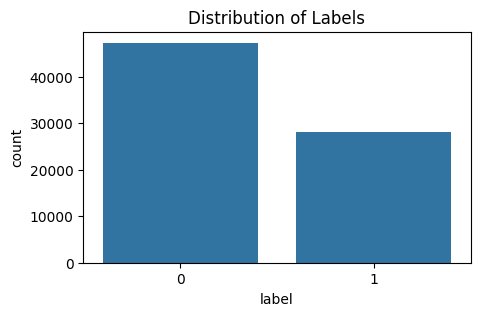

In [6]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Labels")
sns.countplot(df_half_final, x="label")

Clean text

In [7]:
# Load the English stop words list
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the filtered words back into a string
    return ' '.join(filtered_words)

In [8]:
def clean_text(text):
    # Step 1: Remove URLs
    text = re.sub(r'http\S+|https?://\S+|www\.\S+', '', text)
    
    # Step 2: Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Step 3: Remove angle brackets
    text = re.sub(r'<.*?>+', '', text)
    
    # Step 4: Remove newlines, tabs, carriage returns, form feeds, backspace characters
    text = re.sub(r'\n|\t|\r|\f|\b', '', text)
    
    # Step 5: Remove words that contain numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Step 6: Remove any non-alphanumeric characters, then make lowercase
    text = re.sub(r'\W+', ' ', text).lower().strip()
    
    # Step 7: Tokenize the English text using NLTK
    tokens = word_tokenize(text)
    
    # Join tokens back into a string, if desired (for a clean, tokenized version of the text)
    text = ' '.join(tokens)

    return text

In [9]:
tokens = word_tokenize("My name is nguyen quang phu and i am studying at ho chi minh city university of technology")
                       
print(tokens)

['My', 'name', 'is', 'nguyen', 'quang', 'phu', 'and', 'i', 'am', 'studying', 'at', 'ho', 'chi', 'minh', 'city', 'university', 'of', 'technology']


In [10]:
# Apply the clean_text function to the 'text' column and create a new 'processed_text' column
df_half_final['processed_text'] = df_half_final['text'].apply(clean_text)

df_half_final['processed_text_swr'] = df_half_final['processed_text'].apply(remove_stop_words)

In [11]:
print(df_half_final.info())
df_half_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75345 entries, 0 to 75344
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                75345 non-null  object
 1   label               75345 non-null  int64 
 2   source              75345 non-null  object
 3   processed_text      75345 non-null  object
 4   processed_text_swr  75345 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB
None


,text,label,source,processed_text,processed_text_swr
0,"There are alot reasons to keep our the despised method of choosing the President. The First reason is because Certainty of Outcome, in the text its states that ""The reason is that the winning candidate's share of the Electoral College invariably exceeds his share of the popular vote. Another example from the text is ""Obama, he recieved 61.7 percent of the electoral vote compared to only 51.3 percent of the popular votes cast for him and Romney... because all of the states award electoral votes on a winner-take-all basis.\n\nAnother reason is that the Electiral College requires a presidential candidate to have trans-regional appeal,in that case, no region has enough electoral votes to elect a president, a solid regional favorite such as Romney was in the South , has no reason to campaign in those states because of the poor economy and because its not a wealthy state, he wont be able to campaign heavily. So he left with no votes and would have to find his Electoral College votes in a more suitable area. In the text its states that ""It is a Desriable result because a candidate with regional appeal is unlikely to be a successful president.""\n\nAlso the Electoral College restores some of the weight in the political balance the large states by population lose by virtue of the mal-apportionment Senate decreed in the Constitution. My proof is in the text ""The popular vote was very close in Florida in 2012 nevertheless Obama who won the that vote got 29 electoral votes. A same victory by the same margin in Wynoming would net the winner only 3 electoral votes.""So, other things equal, a large state gets more attention compared to a small state.\n\nAnd Finally the Electoral College avoids the problemof elections in which no candidate recieves a majority of the votes cast. For example ""Richard Nixon in '68 and Bill Clinton in '92 both had on 43 percent plurality of the popular votes, while winning a majority in the in the Electoral College.\n\nIn Conclusion I think that the we should keep Electoral Colleges and changing to election by popular voting to vote for a President.",0,persuade_corpus,there are alot reasons to keep our the despised method of choosing the president the first reason is because certainty of outcome in the text its states that the reason is that the winning candidate s share of the electoral college invariably exceeds his share of the popular vote another example from the text is obama he recieved percent of the electoral vote compared to only percent of the popular votes cast for him and romney because all of the states award electoral votes on a winner take all basis another reason is that the electiral college requires a presidential candidate to have trans regional appeal in that case no region has enough electoral votes to elect a president a solid regional favorite such as romney was in the south has no reason to campaign in those states because of the poor economy and because its not a wealthy state he wont be able to campaign heavily so he left with no votes and would have to find his electoral college votes in a more suitable area in the text its states that it is a desriable result because a candidate with regional appeal is unlikely to be a successful president also the electoral college restores some of the weight in the political balance the large states by population lose by virtue of the mal apportionment senate decreed in the constitution my proof is in the text the popular vote was very close in florida in nevertheless obama who won the that vote got electoral votes a same victory by the same margin in wynoming would net the winner only electoral votes so other things equal a large state gets more attention compared to a small state and finally the electoral college avoids the problemof elections in which no candidate recieves a majority of the votes cast for example richard nixon in and bill clinton in both had on percent plurality of the 

<Axes: xlabel='word_length'>

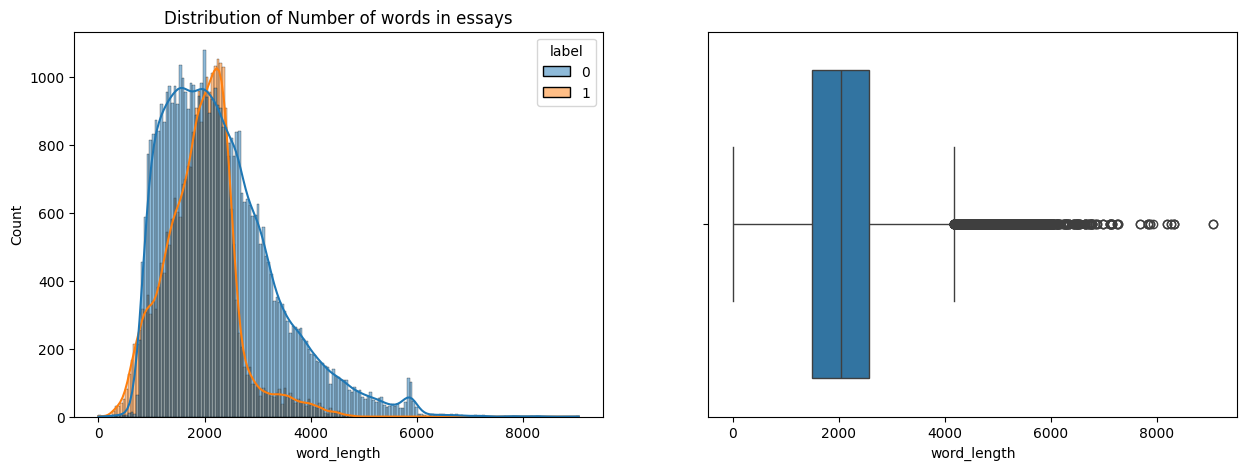

In [12]:
df_half_final["word_length"] = df_half_final.processed_text.apply(lambda t: len(t))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Distribution of Number of words in essays")
sns.histplot(df_half_final, x="word_length", kde=True, hue="label")

plt.subplot(1,2,2)
sns.boxplot(df_half_final, x="word_length")

<Axes: xlabel='word_length'>

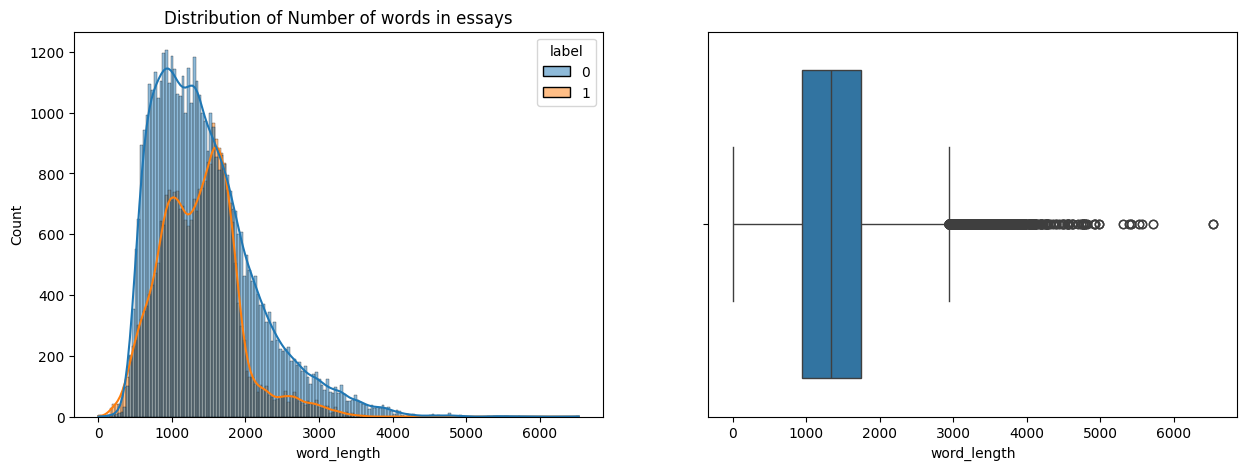

In [13]:
df_half_final["word_length"] = df_half_final.processed_text_swr.apply(lambda t: len(t))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Distribution of Number of words in essays")
sns.histplot(df_half_final, x="word_length", kde=True, hue="label")

plt.subplot(1,2,2)
sns.boxplot(df_half_final, x="word_length")

In [14]:
df_half_final.word_length.describe()

count    75345.000000
mean      1416.122317
std        640.965414
min          0.000000
25%        943.000000
50%       1339.000000
75%       1742.000000
max       6533.000000
Name: word_length, dtype: float64

In [15]:
df_half_final_filtered = df_half_final[df_half_final.word_length >= 10]
print(df_half_final_filtered.word_length.describe())

# df_half_final_filtered = df_half_final[(df_half_final['word_length'] >= lower_bound) & (df_half_final['word_length'] <= upper_bound)]

count    75340.000000
mean      1416.216246
std        640.882966
min         15.000000
25%        943.000000
50%       1339.000000
75%       1742.000000
max       6533.000000
Name: word_length, dtype: float64


In [16]:
df_half_final = df_half_final_filtered

In [17]:
df_half_final[df_half_final["label"] == 0].word_length.describe()

count    47289.000000
mean      1447.661845
std        698.780605
min        118.000000
25%        919.000000
50%       1321.000000
75%       1812.000000
max       6533.000000
Name: word_length, dtype: float64

In [18]:
df_half_final[df_half_final["label"] == 1].word_length.describe()

count    28051.000000
mean      1363.204556
std        524.888850
min         15.000000
25%        980.000000
50%       1366.000000
75%       1681.000000
max       3614.000000
Name: word_length, dtype: float64

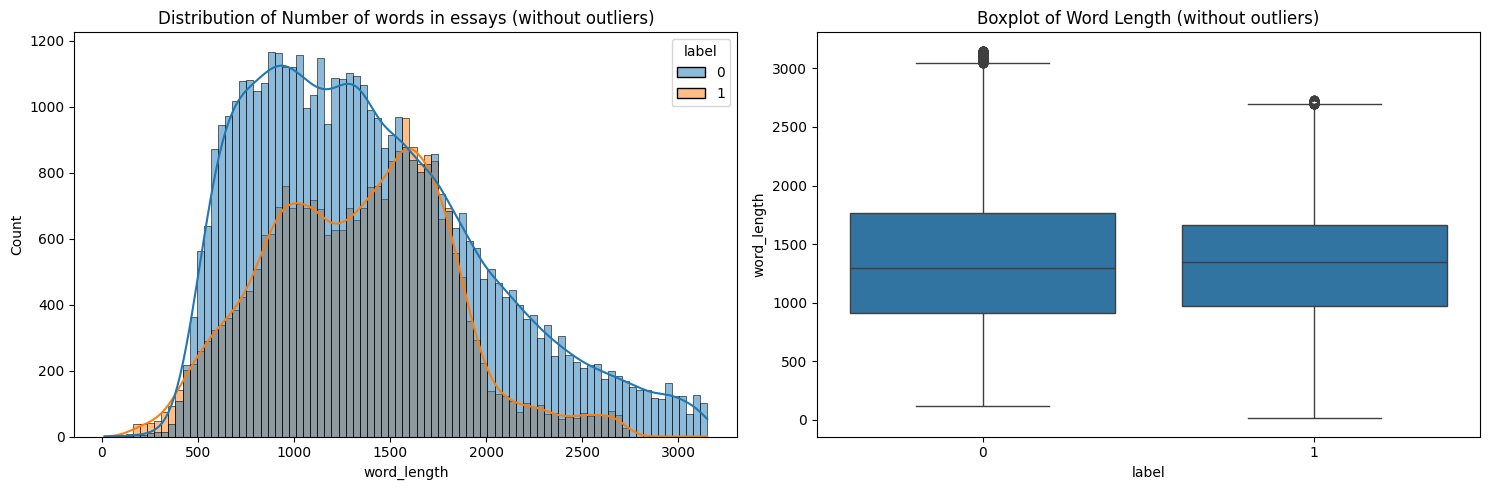

In [19]:
# Function to remove outliers based on IQR for each label separately
def remove_outliers_by_label(df, column, label_column):
    # Separate data by label
    df_filtered = pd.DataFrame()
    
    for label in df[label_column].unique():
        label_df = df[df[label_column] == label]
        
        # Step 1: Calculate Q1 and Q3 for the specific label
        Q1 = label_df[column].quantile(0.25)
        Q3 = label_df[column].quantile(0.75)
        
        # Step 2: Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Step 3: Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Step 4: Filter out the outliers
        filtered_label_df = label_df[(label_df[column] >= lower_bound) & (label_df[column] <= upper_bound)]
        
        # Append filtered data to the final DataFrame
        df_filtered = pd.concat([df_filtered, filtered_label_df])
    
    return df_filtered

# Apply the function to remove outliers separately for each label
df_half_final_filtered = remove_outliers_by_label(df_half_final, 'word_length', 'label')

# Now we plot the graphs without outliers, separately for each label
plt.figure(figsize=(15, 5))

# Distribution plot
plt.subplot(1, 2, 1)
plt.title("Distribution of Number of words in essays (without outliers)")
sns.histplot(df_half_final_filtered, x="word_length", kde=True, hue="label")

# Boxplot
plt.subplot(1, 2, 2)
plt.title("Boxplot of Word Length (without outliers)")
sns.boxplot(data=df_half_final_filtered, x="label", y="word_length")

plt.tight_layout()
plt.show()

In [21]:
print(df_half_final_filtered[df_half_final_filtered["label"] == 0].word_length.describe())
print(df_half_final_filtered[df_half_final_filtered["label"] == 1].word_length.describe())

count    45990.000000
mean      1386.942944
std        602.232429
min        118.000000
25%        909.000000
50%       1301.000000
75%       1763.000000
max       3151.000000
Name: word_length, dtype: float64
count    27473.000000
mean      1328.698286
std        471.884692
min         15.000000
25%        973.000000
50%       1350.000000
75%       1661.000000
max       2732.000000
Name: word_length, dtype: float64


In [22]:
df_half_final = df_half_final_filtered

In [23]:
print(df_half_final.info())
df_half_final.head()

<class 'pandas.core.frame.DataFrame'>
Index: 73463 entries, 0 to 75229
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                73463 non-null  object
 1   label               73463 non-null  int64 
 2   source              73463 non-null  object
 3   processed_text      73463 non-null  object
 4   processed_text_swr  73463 non-null  object
 5   word_length         73463 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.9+ MB
None


,text,label,source,processed_text,processed_text_swr,word_length
0,"There are alot reasons to keep our the despised method of choosing the President. The First reason is because Certainty of Outcome, in the text its states that ""The reason is that the winning candidate's share of the Electoral College invariably exceeds his share of the popular vote. Another example from the text is ""Obama, he recieved 61.7 percent of the electoral vote compared to only 51.3 percent of the popular votes cast for him and Romney... because all of the states award electoral votes on a winner-take-all basis.\n\nAnother reason is that the Electiral College requires a presidential candidate to have trans-regional appeal,in that case, no region has enough electoral votes to elect a president, a solid regional favorite such as Romney was in the South , has no reason to campaign in those states because of the poor economy and because its not a wealthy state, he wont be able to campaign heavily. So he left with no votes and would have to find his Electoral College votes in a more suitable area. In the text its states that ""It is a Desriable result because a candidate with regional appeal is unlikely to be a successful president.""\n\nAlso the Electoral College restores some of the weight in the political balance the large states by population lose by virtue of the mal-apportionment Senate decreed in the Constitution. My proof is in the text ""The popular vote was very close in Florida in 2012 nevertheless Obama who won the that vote got 29 electoral votes. A same victory by the same margin in Wynoming would net the winner only 3 electoral votes.""So, other things equal, a large state gets more attention compared to a small state.\n\nAnd Finally the Electoral College avoids the problemof elections in which no candidate recieves a majority of the votes cast. For example ""Richard Nixon in '68 and Bill Clinton in '92 both had on 43 percent plurality of the popular votes, while winning a majority in the in the Electoral College.\n\nIn Conclusion I think that the we should keep Electoral Colleges and changing to election by popular voting to vote for a President.",0,persuade_corpus,there are alot reasons to keep our the despised method of choosing the president the first reason is because certainty of outcome in the text its states that the reason is that the winning candidate s share of the electoral college invariably exceeds his share of the popular vote another example from the text is obama he recieved percent of the electoral vote compared to only percent of the popular votes cast for him and romney because all of the states award electoral votes on a winner take all basis another reason is that the electiral college requires a presidential candidate to have trans regional appeal in that case no region has enough electoral votes to elect a president a solid regional favorite such as romney was in the south has no reason to campaign in those states because of the poor economy and because its not a wealthy state he wont be able to campaign heavily so he left with no votes and would have to find his electoral college votes in a more suitable area in the text its states that it is a desriable result because a candidate with regional appeal is unlikely to be a successful president also the electoral college restores some of the weight in the political balance the large states by population lose by virtue of the mal apportionment senate decreed in the constitution my proof is in the text the popular vote was very close in florida in nevertheless obama who won the that vote got electoral votes a same victory by the same margin in wynoming would net the winner only electoral votes so other things equal a large state gets more attention compared to a small state and finally the electoral college avoids the problemof elections in which no candidate recieves a majority of the votes cast for example richard nixon in and bill clinton in both had on percent plura

In [26]:
# Remove duplicate rows
df_half_final = df_half_final.drop_duplicates()

# Reset the index to fix any gaps after removing duplicates
df_half_final = df_half_final.reset_index(drop=True)

# Check the result
print(df_half_final.info())
df_half_final.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73463 entries, 0 to 73462
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                73463 non-null  object
 1   label               73463 non-null  int64 
 2   source              73463 non-null  object
 3   processed_text      73463 non-null  object
 4   processed_text_swr  73463 non-null  object
 5   word_length         73463 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.4+ MB
None


,text,label,source,processed_text,processed_text_swr,word_length
0,"There are alot reasons to keep our the despised method of choosing the President. The First reason is because Certainty of Outcome, in the text its states that ""The reason is that the winning candidate's share of the Electoral College invariably exceeds his share of the popular vote. Another example from the text is ""Obama, he recieved 61.7 percent of the electoral vote compared to only 51.3 percent of the popular votes cast for him and Romney... because all of the states award electoral votes on a winner-take-all basis.\n\nAnother reason is that the Electiral College requires a presidential candidate to have trans-regional appeal,in that case, no region has enough electoral votes to elect a president, a solid regional favorite such as Romney was in the South , has no reason to campaign in those states because of the poor economy and because its not a wealthy state, he wont be able to campaign heavily. So he left with no votes and would have to find his Electoral College votes in a more suitable area. In the text its states that ""It is a Desriable result because a candidate with regional appeal is unlikely to be a successful president.""\n\nAlso the Electoral College restores some of the weight in the political balance the large states by population lose by virtue of the mal-apportionment Senate decreed in the Constitution. My proof is in the text ""The popular vote was very close in Florida in 2012 nevertheless Obama who won the that vote got 29 electoral votes. A same victory by the same margin in Wynoming would net the winner only 3 electoral votes.""So, other things equal, a large state gets more attention compared to a small state.\n\nAnd Finally the Electoral College avoids the problemof elections in which no candidate recieves a majority of the votes cast. For example ""Richard Nixon in '68 and Bill Clinton in '92 both had on 43 percent plurality of the popular votes, while winning a majority in the in the Electoral College.\n\nIn Conclusion I think that the we should keep Electoral Colleges and changing to election by popular voting to vote for a President.",0,persuade_corpus,there are alot reasons to keep our the despised method of choosing the president the first reason is because certainty of outcome in the text its states that the reason is that the winning candidate s share of the electoral college invariably exceeds his share of the popular vote another example from the text is obama he recieved percent of the electoral vote compared to only percent of the popular votes cast for him and romney because all of the states award electoral votes on a winner take all basis another reason is that the electiral college requires a presidential candidate to have trans regional appeal in that case no region has enough electoral votes to elect a president a solid regional favorite such as romney was in the south has no reason to campaign in those states because of the poor economy and because its not a wealthy state he wont be able to campaign heavily so he left with no votes and would have to find his electoral college votes in a more suitable area in the text its states that it is a desriable result because a candidate with regional appeal is unlikely to be a successful president also the electoral college restores some of the weight in the political balance the large states by population lose by virtue of the mal apportionment senate decreed in the constitution my proof is in the text the popular vote was very close in florida in nevertheless obama who won the that vote got electoral votes a same victory by the same margin in wynoming would net the winner only electoral votes so other things equal a large state gets more attention compared to a small state and finally the electoral college avoids the problemof elections in which no candidate recieves a majority of the votes cast for example richard nixon in and bill clinton in both had on percent plura

In [27]:
# Export the cleaned dataset to a CSV file
cleaned_file_path = r'E:\2_LEARNING_BKU\2_File_2\K22_HK241\CO3101_Do_an_Tri_tue_nhan_tao\Main\Dataset\final_dataset_v1_afternb1.csv'

# Save the filtered DataFrame as a CSV
df_half_final.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset exported to {cleaned_file_path}")

Cleaned dataset exported to E:\2_LEARNING_BKU\2_File_2\K22_HK241\CO3101_Do_an_Tri_tue_nhan_tao\Main\Dataset\final_dataset_v1_afternb1.csv


In [29]:
df_half_final[df_half_final["word_length"] == 300]

,text,label,source,processed_text,processed_text_swr,word_length
66981,"I believe that children should be taught to compete, but only if it is in a healthy and fun way. I think that children should be taught to cooperate in order to be successful in life. I have seen many examples of children who have been successful in life because they have been able to work together. I have also seen many examples of children who have been successful in life because they have been able to learn to compete. I think that children should be taught to compete in a healthy and fun way, so that they can learn to be successful in life.\n\n",1,personal-sunilthite,i believe that children should be taught to compete but only if it is in a healthy and fun way i think that children should be taught to cooperate in order to be successful in life i have seen many examples of children who have been successful in life because they have been able to work together i have also seen many examples of children who have been successful in life because they have been able to learn to compete i think that children should be taught to compete in a healthy and fun way so that they can learn to be successful in life,believe children taught compete healthy fun way think children taught cooperate order successful life seen many examples children successful life able work together also seen many examples children successful life able learn compete think children taught compete healthy fun way learn successful life,300
70600,"Since Humans exist, one point has always been discussed: advantages and disadvantages to be young or old. The advantages of being young are that you have more time to learn and grow, and you are less likely to get hurt. On the other hand, there are disadvantages of old age, such as being unable to do as much as you used to, or having to wait for someone else to take care of you.\n\nWhat do you think is the most important reason why people choose to live as long as they do? To be able to pass on their knowledge and experience to the next generation.\n\n",1,personal-sunilthite,since humans exist one point has always been discussed advantages and disadvantages to be young or old the advantages of being young are that you have more time to learn and grow and you are less likely to get hurt on the other hand there are disadvantages of old age such as being unable to do as much as you used to or having to wait for someone else to take care of you what do you think is the most important reason why people choose to live as long as they do to be able to pass on their knowledge and experience to the next generation,since humans exist one point always discussed advantages disadvantages young old advantages young time learn grow less likely get hurt hand disadvantages old age unable much used wait someone else take care think important reason people choose live long able pass knowledge experience next generation,300
